In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the Fashion MNIST dataset
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()  # Returns a list of tuples [(train_X, train_y), (test_X, test_y)]

In [5]:
labels = {0: "T-shirt/top", 
          1: "Trouser", 
          2: "Pullover", 
          3: "Dress", 
          4: "Coat", 
          5: "Sandal", 
          6: "Shirt", 
          7: "Sneaker", 
          8: "Bag", 
          9: "Ankle boot"}

In [6]:
# Look at the shape of the dataset
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
# Visualize a sample (first 25 examples) of the data
def visualize_data():
  fig = plt.figure(figsize=(10,10))

  for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(train_X[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels[train_y[i]] + "(" + str(train_y[i]) + ")")

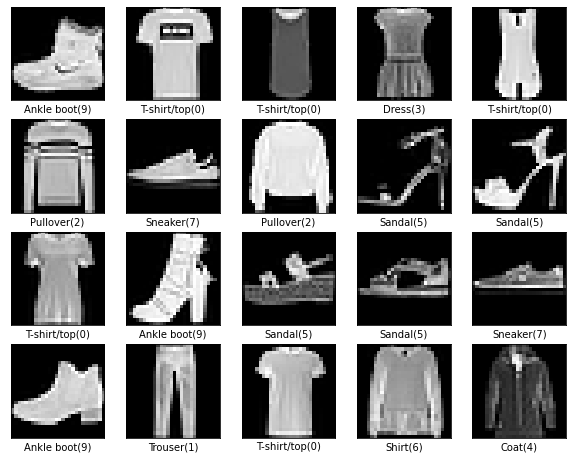

In [24]:
visualize_data()

In [30]:
train_X.shape

(60000, 28, 28, 1)

In [31]:
test_X.shape

(10000, 28, 28, 1)

In [32]:
# Reshape X_train and X_test to be of shape (m,n,n,1)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [38]:
test_X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [36]:
# Normalize the inputs i.e. X_train and X_test
def normalize(train_X, test_X):
  return train_X.astype("float32") / 255.0 , test_X.astype("float32") / 255.0

In [37]:
train_X, test_X = normalize(train_X, test_X)

In [39]:
# Check at the shape of our data
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [40]:
# Convert labels to be one hot encoded
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [41]:
# Display change of categorical label to one hot encoded label
print("Categorical Label", train_y[0])
print("One-Hot Encoded Label", train_y_one_hot[0])

Categorical Label 9
One-Hot Encoded Label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Splitting the Data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Split training data into train and validation sets with an 80 - 20 split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_y_one_hot, test_size=0.2, random_state=13)

In [44]:
# Final check at the shape of our data
train_X.shape, train_label.shape, valid_X.shape, valid_label.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

### Define the Model and Train

In [45]:
# create a ConvNet architecture
fashion_model = tf.keras.Sequential()

fashion_model.add(Conv2D(filters=32, kernel_size=(3,3), activation="linear", padding="same", input_shape=(28, 28, 1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation="linear"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(10, activation="softmax"))

In [46]:
# Compile model
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()

fashion_model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [47]:
# Look at the summary of the model
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [48]:
BATCH_SIZE = 64
EPOCHS = 20

history = fashion_model.fit(x=train_X, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 - 94s - loss: 0.4656 - accuracy: 0.8280 - val_loss: 0.3190 - val_accuracy: 0.8857 - 94s/epoch - 126ms/step
Epoch 2/20
750/750 - 105s - loss: 0.2846 - accuracy: 0.8963 - val_loss: 0.2830 - val_accuracy: 0.8953 - 105s/epoch - 140ms/step
Epoch 3/20
750/750 - 93s - loss: 0.2410 - accuracy: 0.9123 - val_loss: 0.2505 - val_accuracy: 0.9082 - 93s/epoch - 124ms/step
Epoch 4/20
750/750 - 110s - loss: 0.2081 - accuracy: 0.9229 - val_loss: 0.2724 - val_accuracy: 0.8994 - 110s/epoch - 147ms/step
Epoch 5/20
750/750 - 101s - loss: 0.1855 - accuracy: 0.9314 - val_loss: 0.2489 - val_accuracy: 0.9109 - 101s/epoch - 135ms/step
Epoch 6/20
750/750 - 92s - loss: 0.1605 - accuracy: 0.9408 - val_loss: 0.2345 - val_accuracy: 0.9139 - 92s/epoch - 123ms/step
Epoch 7/20
750/750 - 113s - loss: 0.1365 - accuracy: 0.9495 - val_loss: 0.2309 - val_accuracy: 0.9208 - 113s/epoch - 151ms/step
Epoch 8/20
750/750 - 96s - loss: 0.1172 - accuracy: 0.9553 - val_loss: 0.2351 - val_accuracy: 0.9219 - 96s/epo

In [49]:
# Evaluate the data with the test set
test_loss, test_accuracy = fashion_model.evaluate(test_X, test_y_one_hot)
print("Fashion Model Test Accuracy: ", str(test_accuracy))

313/313 [==============================] - 6s 20ms/step - loss: 0.5260 - accuracy: 0.9095
Fashion Model Test Accuracy:  0.909500002861023


In [23]:
epochs = history.epoch
history = history.history

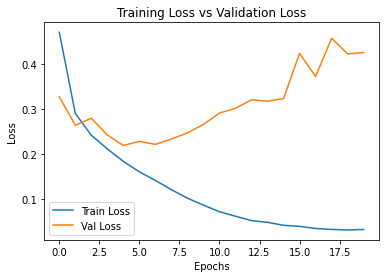

In [24]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

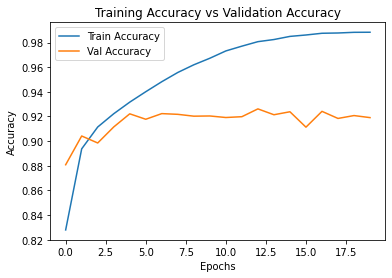

In [25]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [26]:
# Add dropout to the current model architecture
fashion_model = tf.keras.Sequential()

fashion_model.add(Conv2D(filters=32, kernel_size=(3,3), activation="linear", padding="same", input_shape=(28, 28, 1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation="linear"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(10, activation="softmax"))

In [27]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [28]:
# Compile model
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()

fashion_model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
history_dropout = fashion_model.fit(x=train_X, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 - 94s - loss: 0.0289 - accuracy: 0.9895 - val_loss: 0.4945 - val_accuracy: 0.9216 - 94s/epoch - 125ms/step
Epoch 2/20
750/750 - 100s - loss: 0.0259 - accuracy: 0.9911 - val_loss: 0.4498 - val_accuracy: 0.9244 - 100s/epoch - 134ms/step
Epoch 3/20
750/750 - 95s - loss: 0.0244 - accuracy: 0.9912 - val_loss: 0.4662 - val_accuracy: 0.9222 - 95s/epoch - 127ms/step
Epoch 4/20
750/750 - 94s - loss: 0.0256 - accuracy: 0.9908 - val_loss: 0.4620 - val_accuracy: 0.9237 - 94s/epoch - 125ms/step
Epoch 5/20
750/750 - 120s - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.5006 - val_accuracy: 0.9191 - 120s/epoch - 160ms/step
Epoch 6/20
750/750 - 121s - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.4879 - val_accuracy: 0.9217 - 121s/epoch - 161ms/step
Epoch 7/20
750/750 - 118s - loss: 0.0200 - accuracy: 0.9925 - val_loss: 0.5310 - val_accuracy: 0.9212 - 118s/epoch - 158ms/step
Epoch 8/20
750/750 - 133s - loss: 0.0221 - accuracy: 0.9923 - val_loss: 0.5392 - val_accuracy: 0.9235 - 133s/e

In [30]:
# Save model
fashion_model.save("fashion_model_dropout.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [31]:
# Evaluate the data with the test set
test_loss, test_accuracy = fashion_model.evaluate(test_X, test_y_one_hot)
print("Fashion Model Test Accuracy: ", str(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.2212 - accuracy: 0.9196
Fashion Model Test Accuracy:  0.9196000099182129


In [1]:
epochs = history_dropout.epoch
history = history_dropout.history

NameError: name 'history_dropout' is not defined

NameError: name 'epochs' is not defined

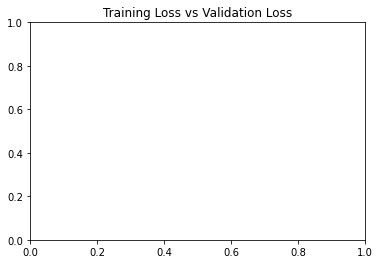

In [24]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

NameError: name 'epochs' is not defined

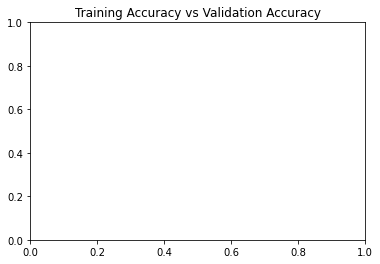

In [23]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### Predict Labels

In [ ]:
predicted_classes = fashion_model.predict(test_X)

In [ ]:
predicted_classes = np.argmax(predicted_classes, axis=1)

In [ ]:
predicted_classes.shape, test_y.shape

In [ ]:
correct = np.where(predicted_classes == test_y[0])
print("Found %d correct labels" %len(correct[0]))

In [ ]:
fig = plt.figure(figsize=(7,7))

for i, correct_idx in enumerate(correct[0][:9]):
  plt.subplot(3,3,i+1)
  img = test_X[correct_idx].reshape(28,28)
  plt.imshow(img, cmap="gray")
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct_idx], test_y[correct_idx]))
  plt.tight_layout()